## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [1]:
import pandas as pd

data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

print(data)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [ ]:
if data.isnull().sum().sum() > 0:
    print("Dataset obsahuje chybajuce hodnoty")
else:
    print("Dataset neobsahuje chybajuce hodnoty")

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [3]:
selected_columns = ['age', 'anaemia', 'high_blood_pressure', 'serum_sodium', 'DEATH_EVENT']

for column in selected_columns:
    print(f"{column}: {data[column].dtype}")

age: float64
anaemia: int64
high_blood_pressure: int64
serum_sodium: int64
DEATH_EVENT: int64


**Obsahuje dataset duplicitné záznamy?**

In [ ]:
if data.duplicated().sum() > 0:
    print("Dataset obsahuje duplicitne zaznamy")
else:
    print("Dataset neobsahuje duplicitne zaznamy")

### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

Dataset neobsahuje duplicitne zaznamy


**Koľko záznamov mužov a žien obsahuje dataset?**

In [6]:
gender_count = data['sex'].value_counts().replace({0: 'zeny', 1: 'muzi'})
for gender, count in gender_count.items():
    if gender == 0:
        print(f"Zeny: {count}")
    else:
        print(f"Muzi: {count}")

Muzi: 194
Zeny: 105


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [9]:
non_smoker_count = data[data['smoking'] == 0].groupby('sex').size()
for gender, count in non_smoker_count.items():
    if gender == 0:
        print(f"zeny: {count}")
    elif gender == 1:
        print(f"muzi: {count}")

zeny: 101
muzi: 102


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [11]:
print(data['age'].describe())

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64
Minimalny vek: 40.0
Maximalny vek: 95.0
Priemerny vek: 60.83389297658862


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [ ]:
print(f"Minimalny vek: {data['age'].min()}")
print(f"Maximalny vek: {data['age'].max()}")
print(f"Priemerny vek: {data['age'].mean()}")

**Z akého veku je v datasete najviac záznamov?**

In [12]:
print(f"Najcastejsi vek: {data['age'].mode()[0]}")

Najcastejsi vek: 60.0


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

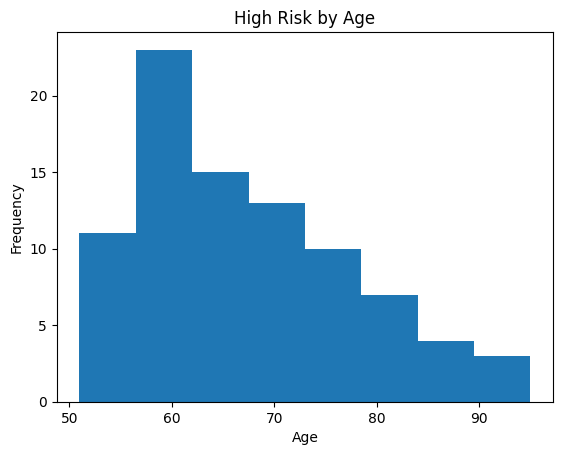

In [13]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data['risk'] = data.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data[data['risk'] == 'High']


Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

In [ ]:
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**V akom veku je riziko zlyhania srdca najväčšie?**

In [14]:
riskiest_age = high_risk['age'].mode()[0]
print(f"Najriskantnejsi vek: {riskiest_age}")

Najriskantnejsie vek: 60.0


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [19]:
riskiest_count = (high_risk['age'] == riskiest_age).sum()
print(riskiest_count)

18


### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


In [21]:
import matplotlib.pyplot as plt
num_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = num_data.corr()

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [23]:
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]
print(corr_pairs)

sex                smoking              0.445892
smoking            sex                  0.445892
serum_creatinine   DEATH_EVENT          0.294278
DEATH_EVENT        serum_creatinine     0.294278
age                DEATH_EVENT          0.253729
                                          ...   
time               age                 -0.224068
ejection_fraction  DEATH_EVENT         -0.268603
DEATH_EVENT        ejection_fraction   -0.268603
time               DEATH_EVENT         -0.526964
DEATH_EVENT        time                -0.526964
Length: 156, dtype: float64


**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [24]:
max_pos_corr = corr_pairs.head(1)
max_neg_cor = corr_pairs.tail(1)

print(max_pos_corr, max_neg_cor)

sex  smoking    0.445892
dtype: float64 DEATH_EVENT  time   -0.526964
dtype: float64


----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure